In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [4]:
df.head(10)

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0
5,5,female,26,156.0,56.0,19.0,100.0,40.5,103.0
6,6,female,21,172.0,73.0,3.0,81.0,38.3,9.0
7,7,male,46,188.0,94.0,23.0,100.0,40.8,145.0
8,8,female,33,166.0,63.0,25.0,107.0,40.5,161.0
9,9,male,65,185.0,88.0,23.0,104.0,41.0,185.0


In [5]:
df.isnull().sum()

,0
id,0
Sex,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [6]:
df.shape

(750000, 9)

In [7]:
df.dtypes

,0
id,int64
Sex,object
Age,int64
Height,float64
Weight,float64
Duration,float64
Heart_Rate,float64
Body_Temp,float64
Calories,float64


In [9]:
df.describe()

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


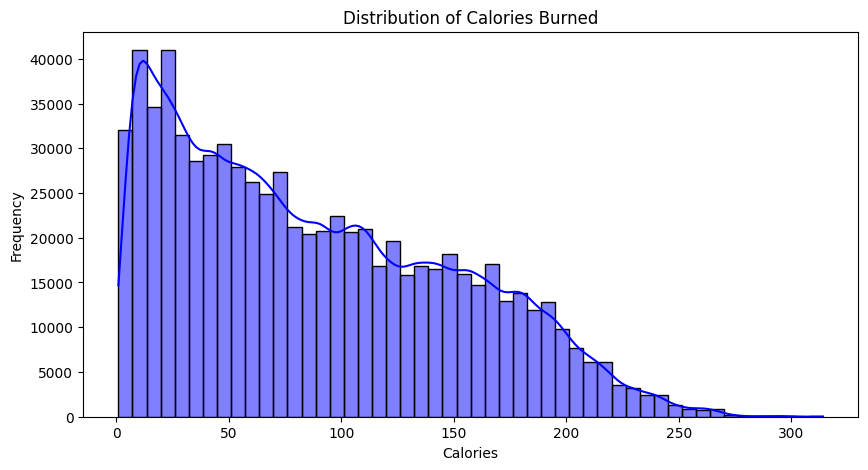

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Calories'], bins=50, kde=True, color='blue')
plt.title("Distribution of Calories Burned")
plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.show()

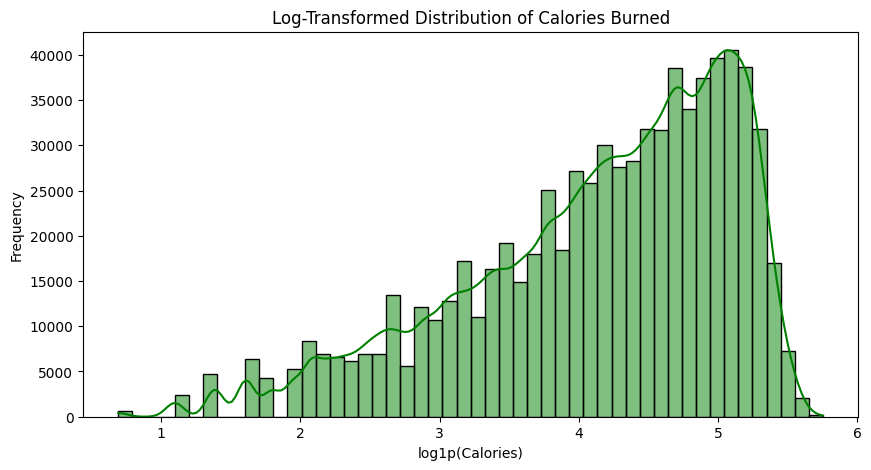

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(np.log1p(df['Calories']), bins=50, kde=True, color='green')
plt.title("Log-Transformed Distribution of Calories Burned")
plt.xlabel("log1p(Calories)")
plt.ylabel("Frequency")
plt.show()

In [12]:
df['Sex_encoded'] = df['Sex'].map({'male': 1, 'female': 0})

In [13]:
df['Sex_encoded']

,Sex_encoded
0,1
1,0
2,0
3,1
4,0
...,...
749995,1
749996,0
749997,1
749998,1


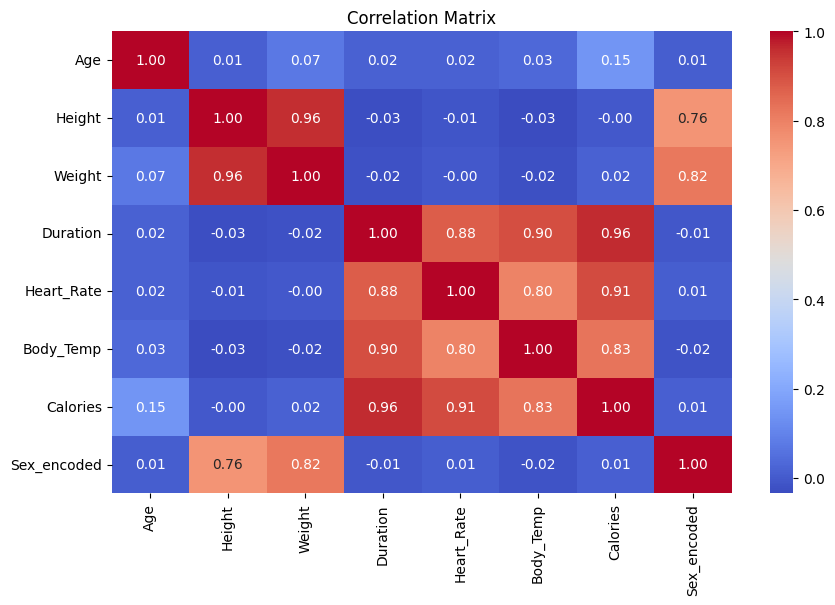

In [14]:
corr = df.drop(columns=['id', 'Sex']).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

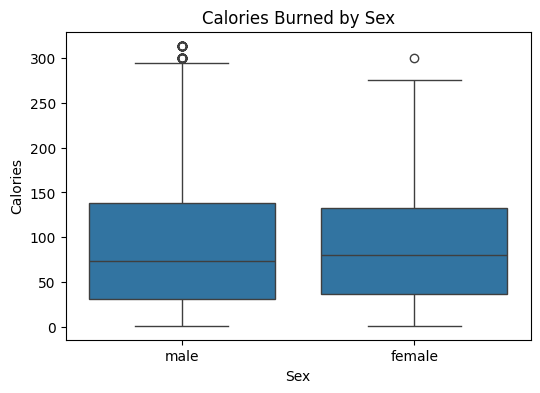

In [15]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Sex', y='Calories')
plt.title("Calories Burned by Sex")
plt.show()

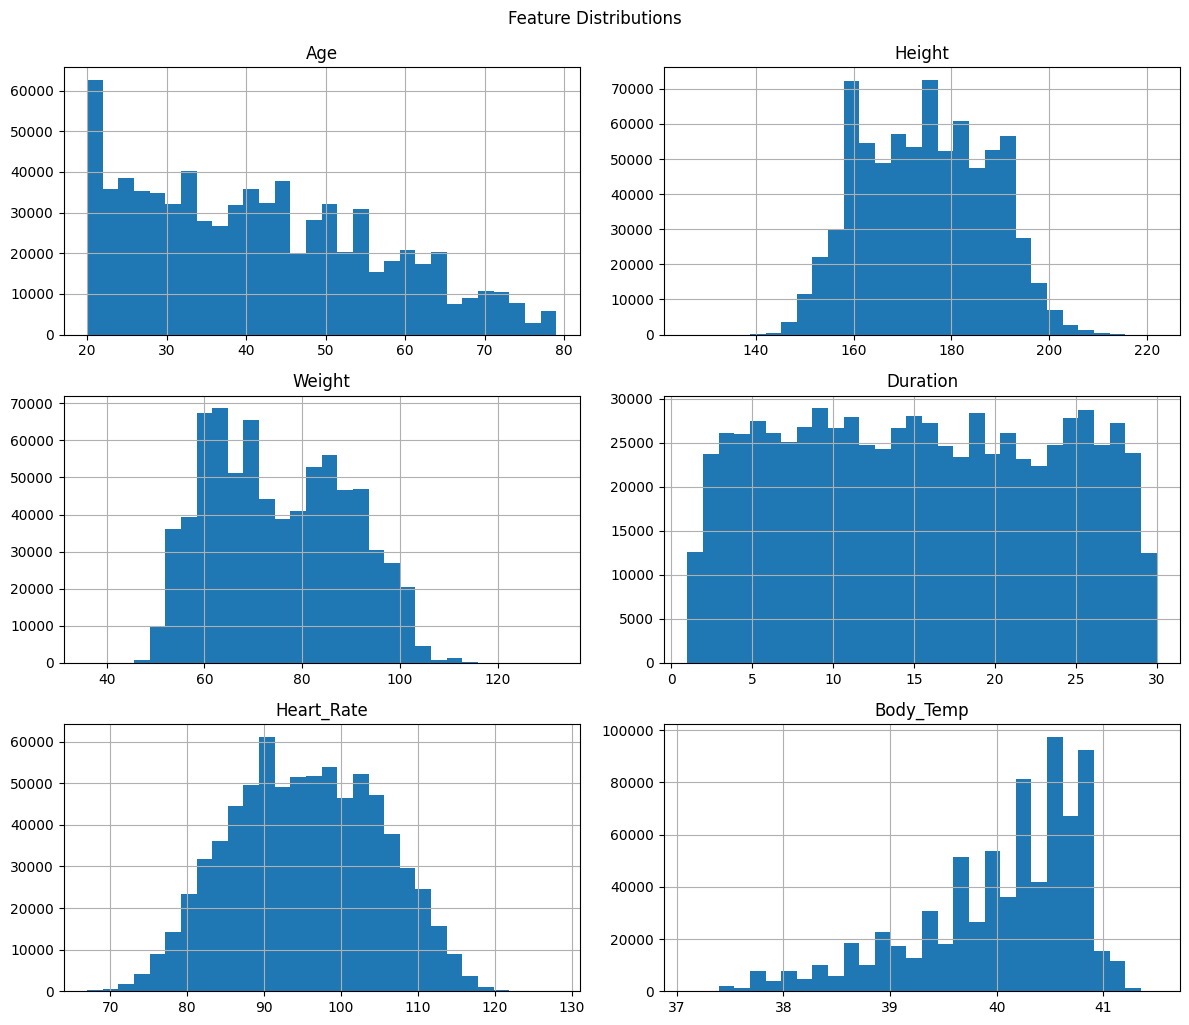

In [16]:
numeric_cols = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']
df[numeric_cols].hist(bins=30, figsize=(12, 10), layout=(3, 2))
plt.tight_layout()
plt.suptitle("Feature Distributions", y=1.02)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [19]:
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

In [21]:
X = df.drop(columns=['id', 'Calories'])

In [22]:
y = df['Calories']

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [25]:
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

In [26]:
lr = LinearRegression()
lr.fit(X_train, y_train_log)

LinearRegression()

In [28]:
value_preds_log = lr.predict(X_val)
value_preds = np.expm1(value_preds_log)
value_preds = np.clip(value_preds, 0, None)

In [29]:
rmsle = np.sqrt(mean_squared_log_error(y_val, value_preds))
print("Validation RMSLE:", rmsle)

Validation RMSLE: 0.1792732020046845


In [43]:
test = pd.read_csv('test.csv')

In [44]:
sample = pd.read_csv('sample_submission.csv')

In [45]:
test['Sex_encoded'] = test['Sex'].map({'male': 1, 'female': 0})

In [46]:
test['Sex'] = LabelEncoder().fit_transform(test['Sex'])

In [47]:
X_test = test.drop(columns=['id'])
X_test.head(10)

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Sex_encoded
0,1,45,177.0,81.0,7.0,87.0,39.8,1
1,1,26,200.0,97.0,20.0,101.0,40.5,1
2,0,29,188.0,85.0,16.0,102.0,40.4,0
3,0,39,172.0,73.0,20.0,107.0,40.6,0
4,0,30,173.0,67.0,16.0,94.0,40.5,0
5,0,43,169.0,65.0,6.0,81.0,39.4,0
6,1,74,189.0,97.0,9.0,86.0,40.0,1
7,1,60,186.0,90.0,2.0,79.0,38.1,1
8,1,21,196.0,91.0,4.0,84.0,38.7,1
9,1,32,189.0,89.0,29.0,111.0,40.8,1


In [48]:
test_preds_log = lr.predict(X_test)

In [49]:
test_preds = np.expm1(test_preds_log)
test_preds = np.clip(test_preds, 0, None)

In [50]:
sample['Calories'] = test_preds
sample.to_csv('submission.csv', index=False)
print("✅ submission.csv is ready!")

✅ submission.csv is ready!


In [51]:
X_train['BMI'] = X_train['Weight'] / (X_train['Height']/100)**2
X_val['BMI'] = X_val['Weight'] / (X_val['Height']/100)**2
X_test['BMI'] = X_test['Weight'] / (X_test['Height']/100)**2

In [52]:
X_train['Duration_HeartRate'] = X_train['Duration'] * X_train['Heart_Rate']
X_val['Duration_HeartRate'] = X_val['Duration'] * X_val['Heart_Rate']
X_test['Duration_HeartRate'] = X_test['Duration'] * X_test['Heart_Rate']

In [54]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.9 MB/s eta 0:00:00


In [55]:
from catboost import CatBoostRegressor

cat_model = CatBoostRegressor(verbose=0, random_state=42)
cat_model.fit(X_train, np.log1p(y_train))
val_preds_cat = np.expm1(cat_model.predict(X_val))
val_preds_cat = np.clip(val_preds_cat, 0, None)
rmsle_cat = np.sqrt(mean_squared_log_error(y_val, val_preds_cat))
print("CatBoost RMSLE:", rmsle_cat)

CatBoost RMSLE: 0.0597801405263235


In [56]:
test_preds = np.expm1(cat_model.predict(X_test))
test_preds = np.clip(test_preds, 0, None)

In [57]:
sample['Calories'] = test_preds
sample.to_csv('submission.csv', index=False)
print("Submission file ready: submission.csv")

Submission file ready: submission.csv
